In [1]:
import pandas as pd

# Charger le classeur Excel
Project = pd.read_excel("C:/Users/PC/Desktop/5edma stage/Project.xlsx", sheet_name=None)

# Afficher les noms des feuilles
print("Noms des feuilles :", Project.keys())

# Accéder aux feuilles spécifiques par leur nom
df_Agence = Project['Agence']
df_Agent = Project['Agent']
df_Client = Project['Client']
df_Compte = Project['Compte']
df_FactTable = Project['FactTable']

# Afficher les premières lignes de chaque feuille spécifique
print("Premières lignes d'Agence :")
print(df_Agence.head())

print("Premières lignes d'Agent :")
print(df_Agent.head())

print("Premières lignes de Client :")
print(df_Client.head())

print("Premières lignes de Compte :")
print(df_Compte.head())

print("Premières lignes de FactTable :")
print(df_FactTable.head())


Noms des feuilles : dict_keys(['Agence', 'Agent', 'Client', 'Compte', 'FactTable'])
Premières lignes d'Agence :
   ID Agence   region  nbr guishet  nbr de client
0          0   Ariana            3            600
1          1  tunisie            3           1000
2          2   Ariana            3            600
3          3   Ariana            3           1000
4          4  tunisie            3           1000
Premières lignes d'Agent :
   ID Agent              nom                         posteactuel  \
0         1    Adel Trabelsi             Responsable des risques   
1         2  Ahmed Ben Salah                  Directeur d'agence   
2         3     Ahmed Hachem  Spécialiste en prêts hypothécaires   
3         4    Ahmed Mansour                   Chef de projet IT   
4         5      Ali Soltani     Agent de service à la clientèle   

        date dembauche  
0  2012-06-23 00:00:00  
1  2005-03-17 00:00:00  
2  2019-04-23 00:00:00  
3  2007-10-22 00:00:00  
4  2008-10-11 00:00:00  
Pr

C:\Users\PC\AppData\Local\Temp\ipykernel_20592\3700427935.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type carte'] = label_encoder_type_carte.fit_transform(data['type carte'])
C:\Users\PC\AppData\Local\Temp\ipykernel_20592\3700427935.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cheque bancaire'] = label_encoder_cheque_bancaire.fit_transform(data['cheque bancaire'])


RMSE Régression Linéaire: 111.99841738653946
RMSE Forêt Aléatoire: 99.86924513610094
Prédictions: [180.90839845 243.81220238]


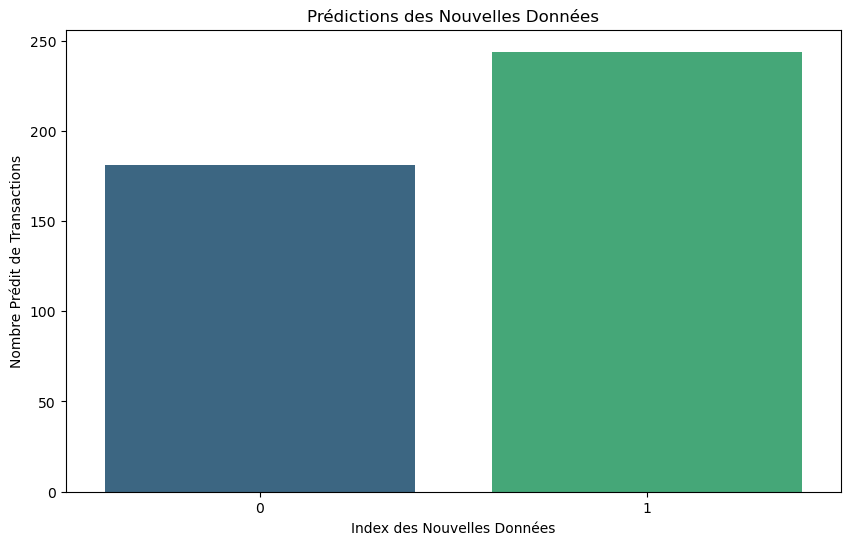

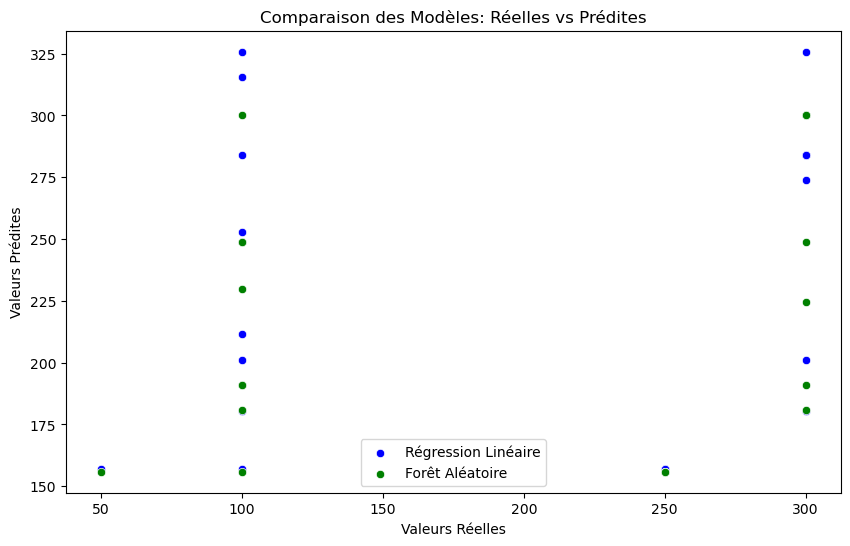

Le meilleur modèle est : Forêt Aléatoire


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le classeur Excel
Project = pd.read_excel("C:/Users/PC/Desktop/5edma stage/Project.xlsx", sheet_name=None)

# Accéder aux feuilles spécifiques par leur nom
df_Agence = Project['Agence']
df_Agent = Project['Agent']
df_Client = Project['Client']
df_Compte = Project['Compte']
df_FactTable = Project['FactTable']

# Fusionner les tables en utilisant la table de faits
merged_data = df_FactTable \
    .merge(df_Agence, on='ID Agence', how='left') \
    .merge(df_Agent, on='ID Agent', how='left') \
    .merge(df_Client, on='ID Clt', how='left') \
    .merge(df_Compte, on='ID Compte', how='left')

# Sélectionner les colonnes pertinentes
data = merged_data[['type carte', 'cheque bancaire', 'nbr de transaction']]

# Encoder les variables catégorielles
label_encoder_type_carte = LabelEncoder()
data['type carte'] = label_encoder_type_carte.fit_transform(data['type carte'])

label_encoder_cheque_bancaire = LabelEncoder()
data['cheque bancaire'] = label_encoder_cheque_bancaire.fit_transform(data['cheque bancaire'])

# Définir les caractéristiques (features) et la cible (target)
X = data[['type carte', 'cheque bancaire']]
y = data['nbr de transaction']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle de régression linéaire
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Faire des prédictions et évaluer le modèle
y_pred_linear = linear_regressor.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Entraîner un modèle de forêt aléatoire
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Faire des prédictions et évaluer le modèle
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Afficher les résultats
print(f"RMSE Régression Linéaire: {rmse_linear}")
print(f"RMSE Forêt Aléatoire: {rmse_rf}")

# Sélection du meilleur modèle
best_model = linear_regressor if rmse_linear < rmse_rf else rf_regressor
best_model_name = "Régression Linéaire" if rmse_linear < rmse_rf else "Forêt Aléatoire"

# Définir toutes les catégories possibles pour chaque colonne
all_categories_type_carte = label_encoder_type_carte.classes_
all_categories_cheque_bancaire = label_encoder_cheque_bancaire.classes_

# Réajuster les label encoders avec toutes les catégories possibles
label_encoder_type_carte.classes_ = all_categories_type_carte
label_encoder_cheque_bancaire.classes_ = all_categories_cheque_bancaire

# Exemple de nouvelles données pour prédiction
new_data = pd.DataFrame({
    'type carte': ['Carte de débit American Express', 'Carte de débit UnionPay'],
    'cheque bancaire': ['oui', 'non']
})

# Encoder les nouvelles données
new_data['type carte'] = label_encoder_type_carte.transform(new_data['type carte'])
new_data['cheque bancaire'] = label_encoder_cheque_bancaire.transform(new_data['cheque bancaire'])

# Faire des prédictions
new_predictions = best_model.predict(new_data)
print(f"Prédictions: {new_predictions}")

# Visualiser les résultats des prédictions
plt.figure(figsize=(10, 6))
sns.barplot(x=new_data.index, y=new_predictions, palette='viridis')
plt.xlabel('Index des Nouvelles Données')
plt.ylabel('Nombre Prédit de Transactions')
plt.title('Prédictions des Nouvelles Données')
plt.show()

# Visualiser les erreurs de prédiction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, label='Régression Linéaire', color='blue')
sns.scatterplot(x=y_test, y=y_pred_rf, label='Forêt Aléatoire', color='green')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison des Modèles: Réelles vs Prédites')
plt.legend()
plt.show()

# Afficher le meilleur modèle
print(f"Le meilleur modèle est : {best_model_name}")


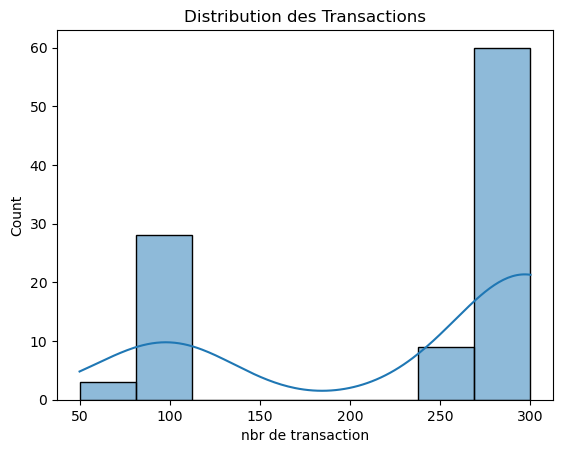

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


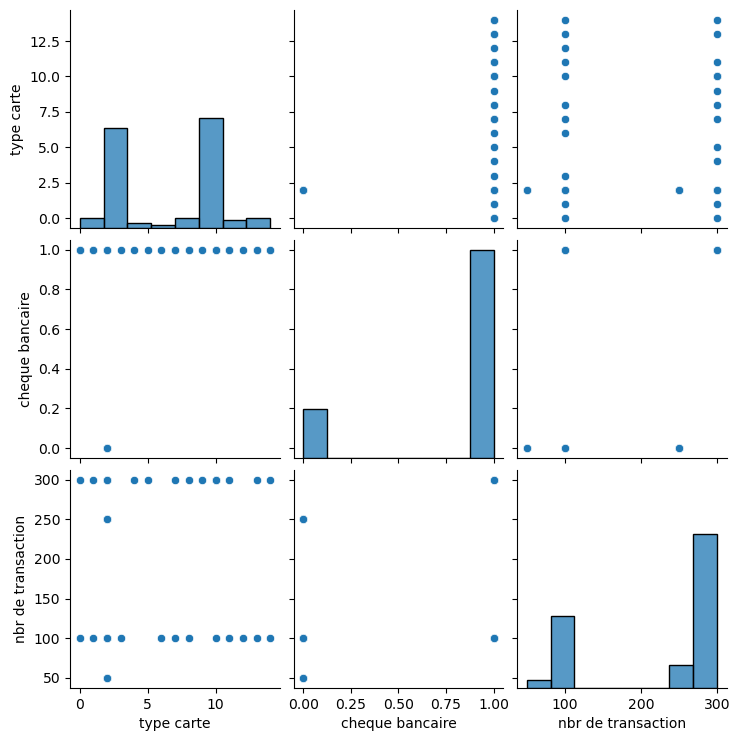

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser la distribution des transactions
sns.histplot(data['nbr de transaction'], kde=True)
plt.title('Distribution des Transactions')
plt.show()

# Visualiser les relations entre les variables
sns.pairplot(data)
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_20592\2169221077.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type carte'] = label_encoder_type_carte.transform(data['type carte'])
C:\Users\PC\AppData\Local\Temp\ipykernel_20592\2169221077.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cheque bancaire'] = label_encoder_cheque_bancaire.transform(data['cheque bancaire'])


RMSE Forêt Aléatoire: 29.097856141126574


IntSlider(value=30, description='Âge:', max=80, min=18)

Dropdown(description='Type Carte:', options=('Carte de débit American Express', 'Carte de débit CartaSi (Itali…

Dropdown(description='Chèque Bancaire:', options=('oui', 'non'), value='oui')

Button(description='Prédire le Solde', style=ButtonStyle())

Prédiction du solde pour un âge de 18 ans, type de carte 'Carte de débit American Express', chèque bancaire 'oui' : 30.45 millions


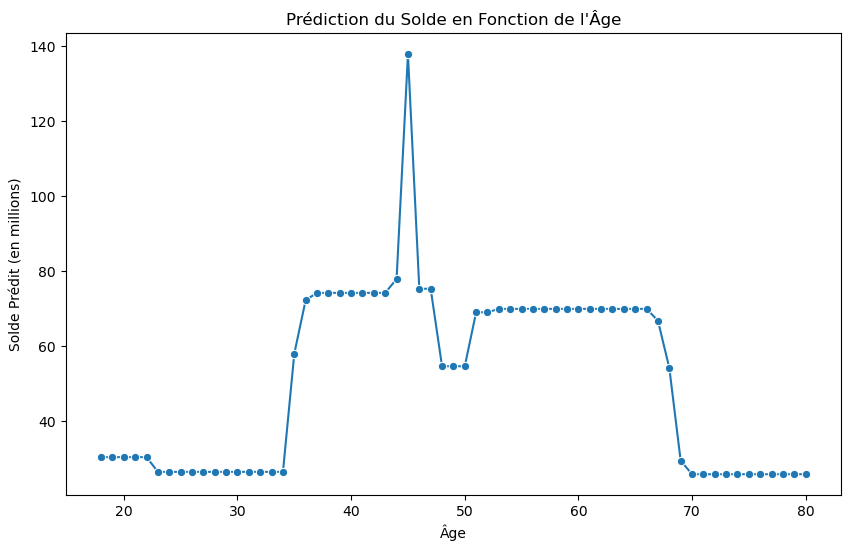

Prédiction du solde pour un âge de 38 ans, type de carte 'Carte de débit Diners Club', chèque bancaire 'non' : 74.8 millions


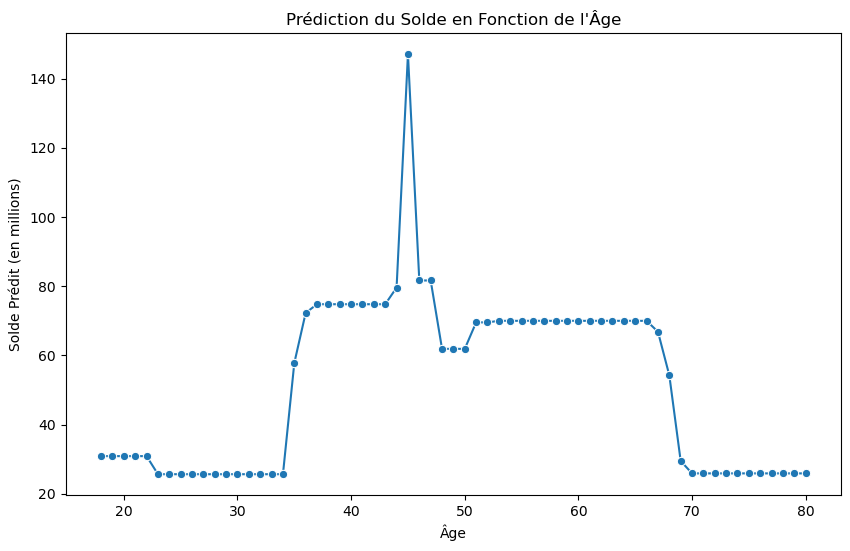

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Charger le classeur Excel
Project = pd.read_excel("C:/Users/PC/Desktop/5edma stage/Project.xlsx", sheet_name=None)

# Accéder aux feuilles spécifiques par leur nom
df_Agence = Project['Agence']
df_Agent = Project['Agent']
df_Client = Project['Client']
df_Compte = Project['Compte']
df_FactTable = Project['FactTable']

# Fusionner les tables en utilisant la table de faits
merged_data = df_FactTable \
    .merge(df_Agence, on='ID Agence', how='left') \
    .merge(df_Agent, on='ID Agent', how='left') \
    .merge(df_Client, on='ID Clt', how='left') \
    .merge(df_Compte, on='ID Compte', how='left')

# Sélectionner les colonnes pertinentes
data = merged_data[['age', 'solde en million', 'type carte', 'cheque bancaire']]

# Extraire toutes les catégories possibles pour les cartes et chèques bancaires
all_categories_type_carte = df_Compte['type carte'].unique()
all_categories_cheque_bancaire = df_Compte['cheque bancaire'].unique()

# Encoder les variables catégorielles
label_encoder_type_carte = LabelEncoder()
label_encoder_type_carte.fit(all_categories_type_carte)
data['type carte'] = label_encoder_type_carte.transform(data['type carte'])

label_encoder_cheque_bancaire = LabelEncoder()
label_encoder_cheque_bancaire.fit(all_categories_cheque_bancaire)
data['cheque bancaire'] = label_encoder_cheque_bancaire.transform(data['cheque bancaire'])

# Définir les caractéristiques (features) et la cible (target)
X = data[['age', 'type carte', 'cheque bancaire']]
y = data['solde en million']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner un modèle de forêt aléatoire
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Faire des prédictions et évaluer le modèle
y_pred_rf = rf_regressor.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Afficher les résultats
print(f"RMSE Forêt Aléatoire: {rmse_rf}")

# Prédiction pour un âge donné
def predict_income(age, card_type, cheque_status):
    if age > 80:
        print("L'âge ne doit pas dépasser 80 ans.")
        return
    if card_type not in all_categories_type_carte:
        print(f"Type de carte inconnu: {card_type}")
        return
    if cheque_status not in all_categories_cheque_bancaire:
        print(f"Statut de chèque inconnu: {cheque_status}")
        return
    new_data = pd.DataFrame({
        'age': [age],
        'type carte': [card_type],
        'cheque bancaire': [cheque_status]
    })
    new_data['type carte'] = label_encoder_type_carte.transform(new_data['type carte'])
    new_data['cheque bancaire'] = label_encoder_cheque_bancaire.transform(new_data['cheque bancaire'])
    new_data_scaled = scaler.transform(new_data)
    predicted_income = rf_regressor.predict(new_data_scaled)
    return predicted_income[0]

# Fonction pour afficher les prédictions et visualisations
def display_prediction(age, card_type, cheque_status):
    predicted_income = predict_income(age, card_type, cheque_status)
    if predicted_income is not None:
        print(f"Prédiction du solde pour un âge de {age} ans, type de carte '{card_type}', chèque bancaire '{cheque_status}' : {predicted_income} millions")

        # Visualiser les résultats des prédictions
        ages = np.arange(18, 81)
        predictions = [predict_income(age, card_type, cheque_status) for age in ages]

        plt.figure(figsize=(10, 6))
        sns.lineplot(x=ages, y=predictions, marker='o')
        plt.xlabel('Âge')
        plt.ylabel('Solde Prédit (en millions)')
        plt.title('Prédiction du Solde en Fonction de l\'Âge')
        plt.show()

# Créer des widgets pour l'entrée utilisateur
age_input = widgets.IntSlider(min=18, max=80, step=1, description='Âge:', value=30)
card_type_input = widgets.Dropdown(options=all_categories_type_carte.tolist(), description='Type Carte:')
cheque_status_input = widgets.Dropdown(options=all_categories_cheque_bancaire.tolist(), description='Chèque Bancaire:')

display(age_input, card_type_input, cheque_status_input)

# Créer un bouton pour afficher la prédiction
button = widgets.Button(description="Prédire le Solde")
display(button)

# Fonction pour le bouton
def on_button_clicked(b):
    display_prediction(age_input.value, card_type_input.value, cheque_status_input.value)

button.on_click(on_button_clicked)


Rapport de classification :
                                                     precision    recall  f1-score   support

                Accès limité aux services bancaires       0.00      0.00      0.00         1
           Changement dans les politiques bancaires       0.00      0.00      0.00         1
         Changement dans les relations commerciales       0.00      0.00      0.00         3
               Changement de réglementation fiscale       0.00      0.00      0.00         2
     Conversion en institution financière islamique       0.00      0.00      0.00         1
               Décision de centraliser les finances       0.00      0.00      0.00         0
                       Décès du titulaire du compte       0.00      0.00      0.00         1
                          Déménagement à l'étranger       0.00      0.00      0.00         2
                 Désir d'une banque plus écologique       0.00      0.00      0.00         3
        Exigences de confidentialité non 

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

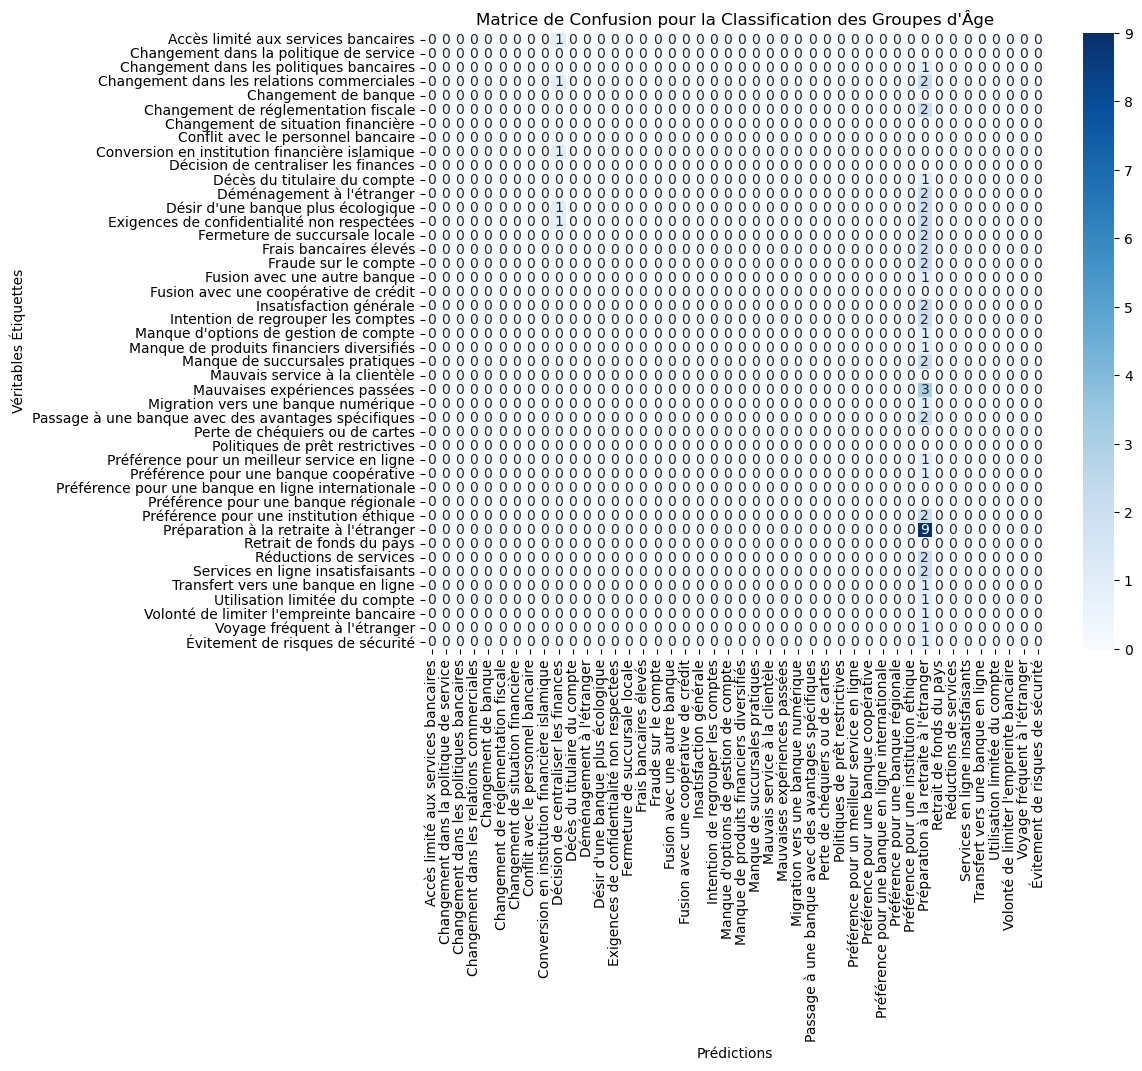

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Préparer les données
X = df_Client[['age']]
y = df_Client['motif']

# Convertir les motifs en variables catégorielles (one-hot encoding)
y_encoded = pd.get_dummies(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un pipeline avec StandardScaler et SVM
pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', random_state=42)
)

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Faire des prédictions
y_pred = pipeline.predict(X_test)

# Évaluer le modèle
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=y_encoded.columns)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_encoded.columns, yticklabels=y_encoded.columns)
plt.title('Matrice de Confusion pour la Classification des Groupes d\'Âge')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Étiquettes')
plt.show()


In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming DataFrames are already loaded as df_Client, df_Compte, df_Agence, df_Agent, df_FactTable

# Merge DataFrames
df = pd.merge(pd.merge(pd.merge(df_Client, df_FactTable, left_on='ID Clt', right_on='ID Clt'),
                      df_Compte, left_on='ID Compte', right_on='ID Compte'),
              df_Agence, left_on='ID Agence', right_on='ID Agence')

# Prepare features
X = df[['motif']]

# Encode the motif column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=True), ['motif'])
    ]
)

# Preprocess data
X_processed = preprocessor.fit_transform(X)

# Scale the data with MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_processed)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test cluster numbers from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the plots, select the optimal number of clusters
optimal_n_clusters = 5  # Replace with your choice based on the plots

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Determine the most common motif in each cluster
cluster_motif = df.groupby('cluster')['motif'].agg(lambda x: x.mode()[0]).reset_index()
cluster_motif.columns = ['cluster', 'predicted_motif']

# Merge the predicted motif back into the original DataFrame
df = df.merge(cluster_motif, on='cluster')

# Function to predict motif based on new motif
def predict_motif(motif):
    # Convert motif to DataFrame
    motif_df = pd.DataFrame([[motif]], columns=['motif'])
    
    # Preprocess the motif
    motif_processed = preprocessor.transform(motif_df)
    
    # Scale the data
    motif_scaled = scaler.transform(motif_processed)
    
    # Predict the cluster
    cluster = kmeans.predict(motif_scaled)[0]
    
    # Get the predicted motif for the cluster
    predicted_motif = cluster_motif[cluster_motif['cluster'] == cluster]['predicted_motif'].values[0]
    return f"Le motif prédit pour '{motif}' est {predicted_motif}."



C:\Users\PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

ValueError: Number of labels is 4. Valid values are 2 to n_samples - 1 (inclusive)